> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: NoShow Appointements

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#dw">Data Wrangling</a></li>
<li><a href="#dc">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#sources">Sources</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Note**: Sources used are at the very end of the notebook.

In [2]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
% matplotlib inline

# Questions:

### 1. How much time usually passes between the scheduled day and the appointement day?
### 2. What is the most important factor for patients to not show up?

### Todo:
#### Wrangling and Cleaning
1. Checking the dataset for missing values, duplicates
2. Cleaning Column labels
    - making them lowercase (to prevent possible future problems)
    - Handcap -> handicap
    - Hipertension -> hypertension
    - appointement_day
    - scheduled_day
    - no_show
3. Fixing Data types
    - Trying to make PatientID from float to int and see if that changes anything
    - I guess no_show could be changed to int and yes/no replaced with 0/1 but I leave it as it is for now
    - changing appointment and scheduled day to datetime format and dropping the time
    - new column for gender_id
    - new column for waiting_time
    - make a new df for all no_show patients to analyze the subgroup
#### Exploring
1. Trying to find interesting points in the data
2. Plotting 
#### Conclusion
1. Short summary of all things found during exploration
2. Limitations

<a id='dw'></a>
## Data Wrangling

In [15]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.shape

(110527, 14)

In [17]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


First look:
- PatientID seems to be messed up -> float to int
- no missing data
- wrong title "Hipertension" "Handcap"
- no full duplicates
- PatientIDs are duplicated -> same patient probably had multiple appointements

In [20]:
sum(df.duplicated())

0

<a id='dc'></a>
## Data Cleaning

In [21]:
#lowercase
df.columns = df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
#renaming
df.rename({'patientid': 'patient_id', 'appointmentid': 'appointment_id', 'scheduledday': 'scheduled_day', 'appointmentday': 'appointment_day', 'hipertension': 'hypertension', 'handcap': 'handicap', 'no-show': 'no_show'}, axis='columns', inplace=True)

In [23]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
#changing dates into the datetime format
#I deleted the time to avoid negative values that happened during data analysis
df['appointment_day'] =  pd.to_datetime(df['appointment_day'])
df['scheduled_day'] =  pd.to_datetime(df['scheduled_day'])
df['appointment_day'] =  pd.to_datetime(df['appointment_day'].dt.date)
df['scheduled_day'] =  pd.to_datetime(df['scheduled_day'].dt.date)
#I'm sure there are more elegant ways to convert it directly but I couldn't find any.
# As suggested I tried it with only the last 2 lines, which makes sense, 
# but gives me an error that .dt can only be used in the datetime format

In [34]:
# First I need to generate a new parameter for the waiting time
# For that I need to substract the appointment day from the scheduled day
# Here I had negative values in waiting_time due to the timestamp in the date, which I 
# deleted in the cell above after the error
df['waiting_time'] = (df.appointment_day - df.scheduled_day).dt.days

In [25]:
#making a new column for gender for easier plotting later on
df['gender_id']= df['gender'].apply(lambda x: 0 if x =="M" else 1)

In [26]:
#selecting all no_show patients
df_no_show = df.loc[df['no_show'] == 'Yes'] 

In [27]:
df_no_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 15 columns):
patient_id         22319 non-null float64
appointment_id     22319 non-null int64
gender             22319 non-null object
scheduled_day      22319 non-null datetime64[ns]
appointment_day    22319 non-null datetime64[ns]
age                22319 non-null int64
neighbourhood      22319 non-null object
scholarship        22319 non-null int64
hypertension       22319 non-null int64
diabetes           22319 non-null int64
alcoholism         22319 non-null int64
handicap           22319 non-null int64
sms_received       22319 non-null int64
no_show            22319 non-null object
gender_id          22319 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 2.7+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### What is the most important factor for patients to not show up?

In [28]:
#Now that we have all patients selected that did not show up we can analyze why
#Let us start with the neighbourhood, distance might be an important factor
df_no_show['neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
JESUS DE NAZARETH               696
JARDIM DA PENHA                 631
CARATOÍRA                       591
TABUAZEIRO                      573
BONFIM                          550
ILHA DO PRÍNCIPE                532
ANDORINHAS                      521
SÃO PEDRO                       515
SANTO ANDRÉ                     508
SANTA MARTHA                    496
SANTO ANTÔNIO                   484
ROMÃO                           474
GURIGICA                        456
JABOUR                          451
DA PENHA                        429
SÃO JOSÉ                        428
MARUÍPE                         424
NOVA PALESTINA                  402
BELA VISTA                      384
SANTOS DUMONT                   369
SÃO CRISTÓVÃO                   363
ILHA DE SANTA MARIA             361
FORTE SÃO JOÃO              

Ok, so of the 22319 patients that did not show up to their appointement most are from JARDIM CAMBURI or MARIA ORTIZ. Maybe one should offer those people better healthcare access?

In [29]:
#Beside the location are there additional factors (smoking, drinking etc.) 
#influencing the reliability to show up?
df_no_show['alcoholism'].value_counts()

0    21642
1      677
Name: alcoholism, dtype: int64

In [30]:
df_no_show['diabetes'].value_counts()

0    20889
1     1430
Name: diabetes, dtype: int64

In [74]:
df_no_show['handicap'].value_counts()

0    21912
1      366
2       37
3        3
4        1
Name: handicap, dtype: int64

In [75]:
df_no_show['handicap'].sum()

453

In [32]:
df_no_show['hypertension'].value_counts()

0    18547
1     3772
Name: hypertension, dtype: int64

In [33]:
df_no_show['gender'].value_counts()

F    14594
M     7725
Name: gender, dtype: int64

**Lifestyle factors play a minor role. Nevertheless hypertension, followed by diabetes, then alcoholism and lastly handicapped patients did not show up.
Interestingly there's almost twice as many women as men not showing up.**

In [22]:
df.describe()

,patientid,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,genderID,waiting_time
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.649977,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.476979,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


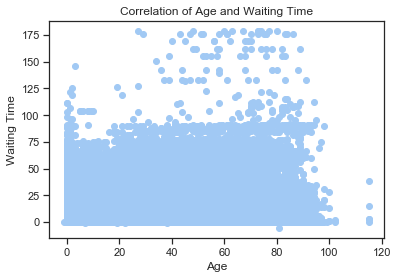

In [64]:
plt.scatter(x='age', y='waiting_time', data=df)
plt.xlabel("Age")
plt.ylabel("Waiting Time")
plt.title("Correlation of Age and Waiting Time");
# The result is not really interpretable

<a id='conclusions'></a>
## Conclusions

1. From 110527 patients 22319 did not show up.
2. Secondary factors like hypertension, diabetes, alcoholism and handicap play a minor role
3. The neighbourhood is not a neglectable factor, two neighbourhoods have over 1.000 people not showing up
4. The majority of the people not showing up are under 60 years of age
5. The majority of people not showing up are women
6. The average waiting time between the scheduled day and the appointment day is ~10 days
7. Waiting Time and Age do not seem to be connected

#### Limitations:
1. The neighbourhoods do not have any context e.g. distance to primary care unit etc. that would help to illustrate the location as a factor
2. PatientID and AppointmentID could not be converted to actually be used for any kind of analysis
3. Information for the columns scholarship and sms_received is missing, their meaning can only be assumed.

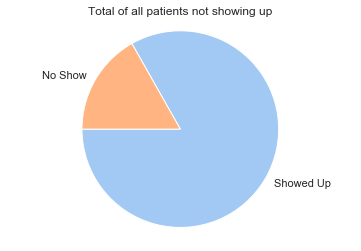

In [66]:
# Plot for overall patients
labels = 'Showed Up', 'No Show'
sizes = [110527, 22319]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=180)
ax1.axis('equal')
ax1.set_title("Total of all patients not showing up");

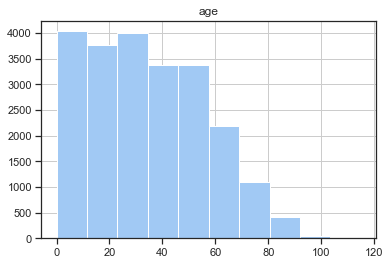

In [67]:
# Plot for Age distribution
df_no_show.hist('age');

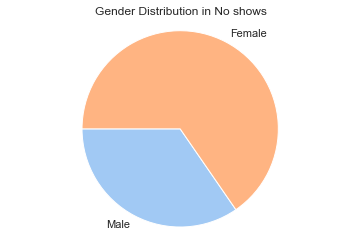

In [65]:
# Plot for gender distribution
labels = 'Male', 'Female'
sizes = [7725, 14594]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=180)
ax1.axis('equal')
ax1.set_title("Gender Distribution in No shows");

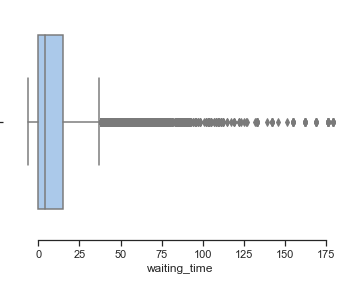

In [35]:
# Plot for average waiting time
sns.set(style='ticks', palette='pastel')
sns.boxplot(df.waiting_time)
sns.despine(offset=10, trim=True)

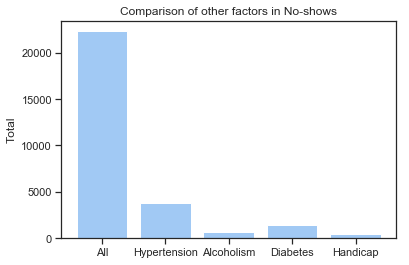

In [94]:
# Plot comparing additional factors to overall no shows
x = ['All', 'Hypertension', 'Alcoholism', 'Diabetes', 'Handicap']
x_values = [22319, 3772, 677, 1430, 453]
total = 22319

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, x_values)
plt.ylabel("Total")
plt.title("Comparison of other factors in No-shows")
plt.xticks(x_pos, x);

<a id='sources'></a>
# Sources:
    https://matplotlib.org/tutorials/introductory/sample_plots.html
    https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
    https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
    https://seaborn.pydata.org/examples/distplot_options.html
    http://benalexkeen.com/bar-charts-in-matplotlib/

In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0